In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Generating data
data = {'X':[2,3,4,5,6,7,8,9,10,11,12,13],
 'Y':[4,7,10,13,16,19,22,25,28,31,34,37]}

In [3]:
#converting the data to Dataframe
df = pd.DataFrame(data)


In [4]:
#creatin the Loss function
def loss(f,y):
  squared_loss = (y-f)**2
  return squared_loss

In [5]:
#creating the gradient function
def gradient_compute(w,f,y):
  dj_dw = -2*(y-f)*w
  dj_db = -2*(y-f)
  return [dj_dw,dj_db]

In [6]:
#implementing Stochastic Gradient Descent
def SGD(w,b,X,y,alpha=0.001,iterations=50):
  squared_error = []
  for j in range(iterations):
    for i in range(len(X)):
      f = w*X[i] + b
      squared_error.append(loss(f,y[i]))
      dj_dw_i,dj_db = gradient_compute(w,f,y[i])
      w = w - alpha*dj_dw_i
      b = b - alpha*dj_db
  return [w,b,squared_error]

In [7]:
#splitting the datasets
w = 1
b = 1
X_train = df.X[:8]
Y_train = df.Y[:8]
X_test = df.X[8:]
Y_test = df.Y[8:]
w,b,error_list = SGD(w,b,X_train,Y_train)

In [8]:
#finding the optimal values for 'w' and 'b'
print(f'The optimal value of w is found to be {w}')
print(f'The optimal value of b is found to be {b}')

The optimal value of w is found to be 2.319540700531465
The optimal value of b is found to be 1.848624133606565


In [9]:
#printing the predicted values
predicted = X_test*w + b
print(predicted)

8     25.044031
9     27.363572
10    29.683113
11    32.002653
Name: X, dtype: float64


In [10]:
#accuracy and loss
test_error = np.mean((predicted - Y_test)**2)
print(f'The test error was found to be {test_error}')
print(f'The test accuracy was : {(1-test_error)*100} %')

The test error was found to be 16.392588412865045
The test accuracy was : -1539.2588412865045 %


In [11]:
(predicted - Y_test)**2

8      8.737752
9     13.223610
10    18.635517
11    24.973475
dtype: float64

In [12]:
Y_test

8     28
9     31
10    34
11    37
Name: Y, dtype: int64

In [13]:
predicted

8     25.044031
9     27.363572
10    29.683113
11    32.002653
Name: X, dtype: float64

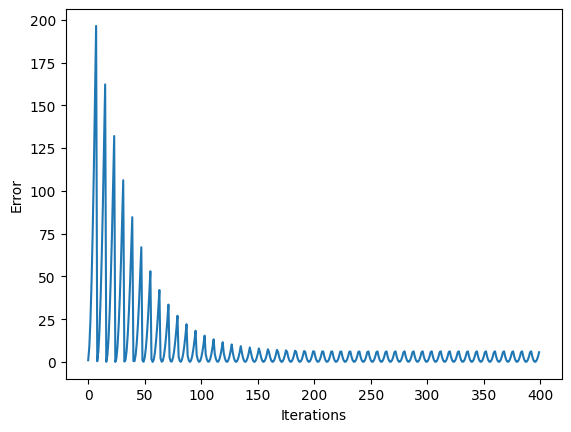

In [14]:
#plotiing the graph
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

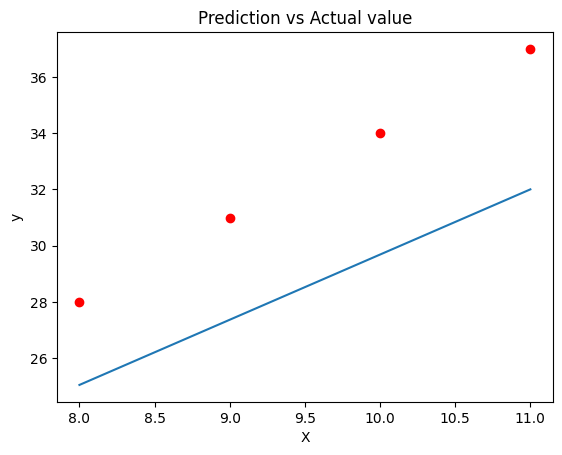

In [15]:
plt.plot(predicted)
plt.plot(Y_test,'ro')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Prediction vs Actual value')
plt.show()